In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
df.rename(columns={'education.num':'education_num','marital.status':'marital_status','capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week','native.country':'native_country'},inplace=True)

In [10]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
#making a copy of dataset
dfc=df

In [15]:
#checking for '?' in the dataset
dfc.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [16]:
#checking for ',' in the dataset
dfc.isin([',']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
#checking for ',' in the dataset
dfc.isin([' ']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [39]:
round(dfc.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.6,13.6,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.4,105550.0,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.1,2.6,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.6,7385.3,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.3,403.0,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.4,12.3,1.0,40.0,40.0,45.0,99.0


## EDA
#univariate Analysis

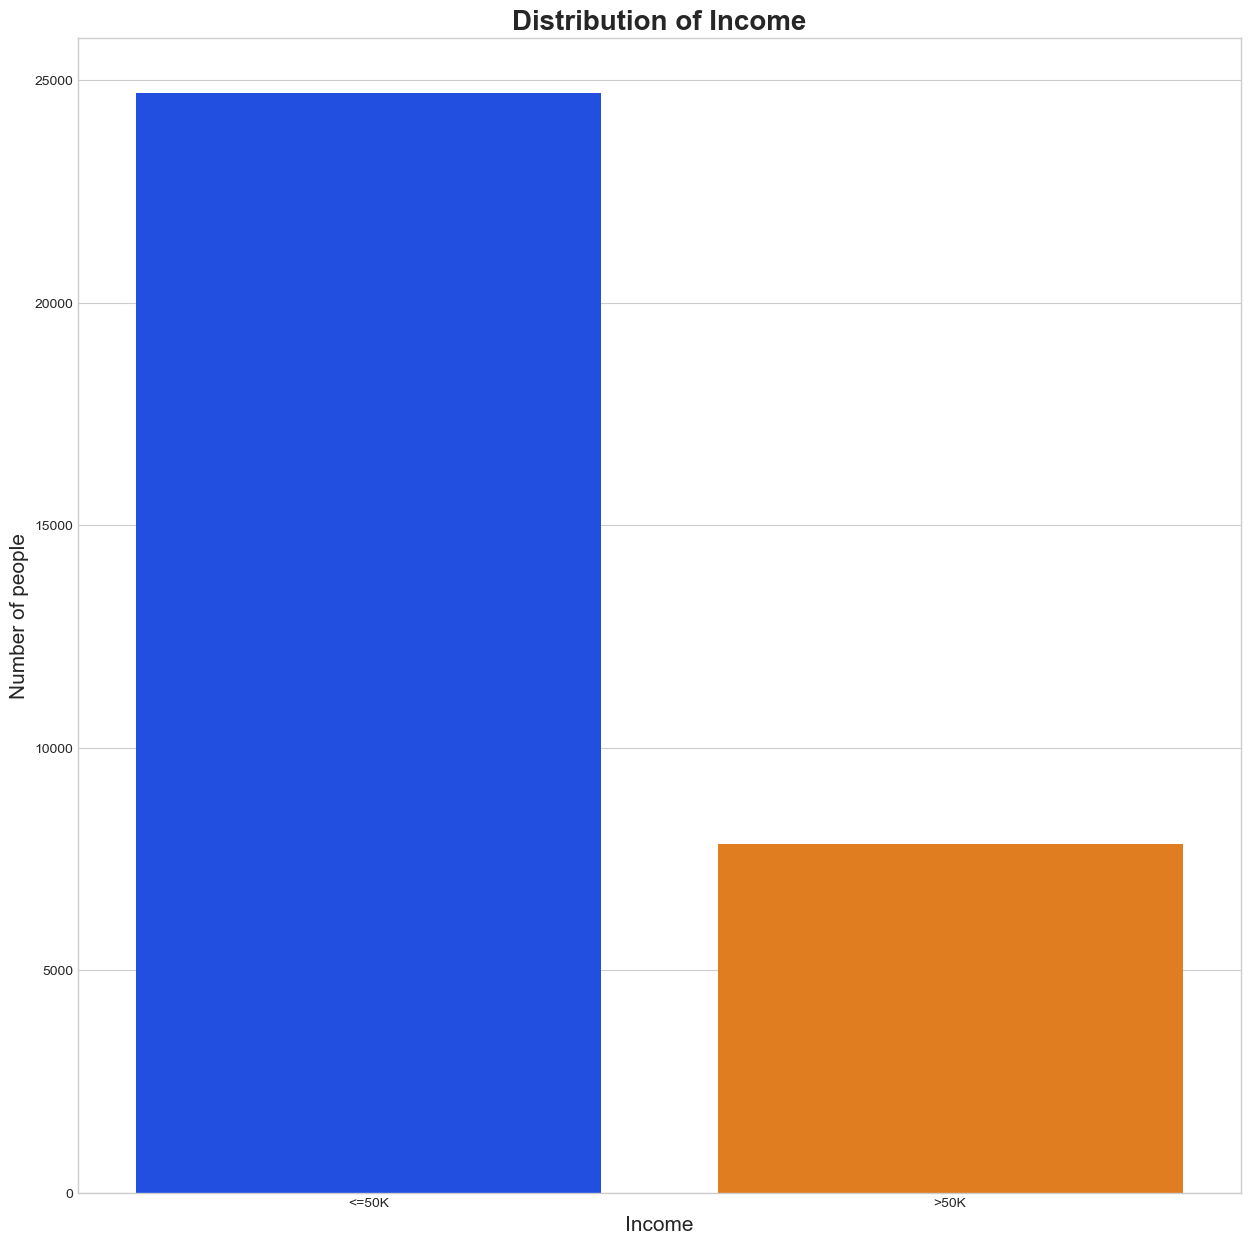

In [18]:
#creating a barplot for Income Feature
income=dfc['income'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,15))
sns.barplot(income.index,income.values,palette ='bright')
plt.title('Distribution of Income',fontsize=20, fontweight='bold')
plt.xlabel('Income',fontsize= 15)
plt.ylabel('Number of people',fontsize=15)
plt.tick_params(labelsize=10)
plt.show()

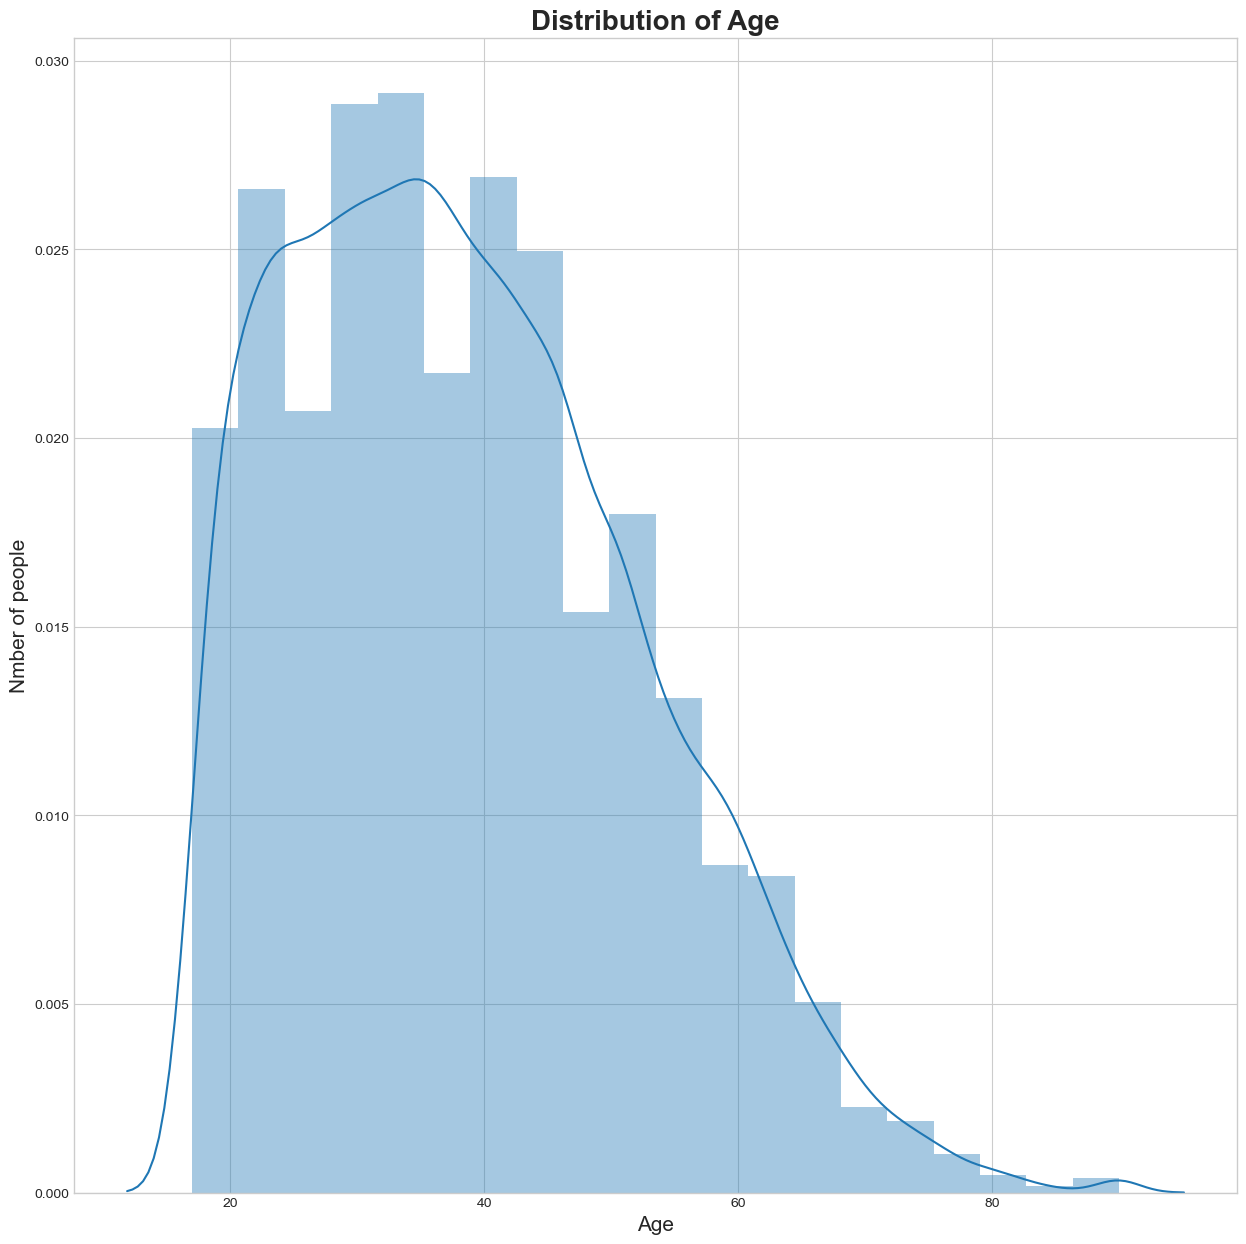

In [25]:
#creating a distribution plot for Age
age= dfc['age'].value_counts()
plt.figure(figsize=(15,15))
sns.distplot(dfc['age'],bins=20)
plt.title('Distribution of Age',fontsize=20,fontweight='bold')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Nmber of people',fontsize=15)
plt.tick_params(labelsize=10)
plt.show()

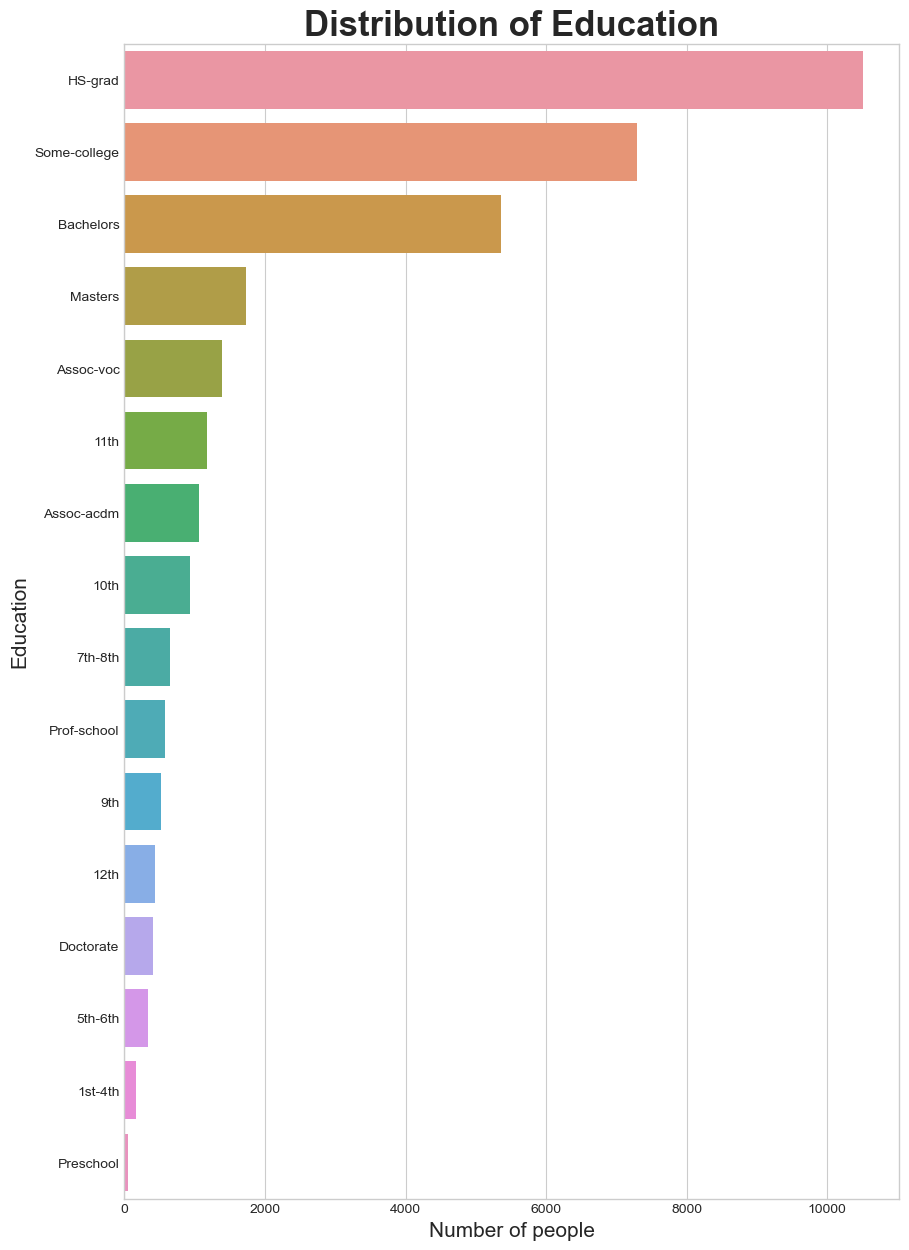

In [28]:
#creating a barplot for 'Education'
education=dfc['education'].value_counts()
plt.figure(figsize=(10,15))
sns.barplot(education.values,education.index)
plt.title('Distribution of Education', fontsize=25, fontweight='bold')
plt.xlabel('Number of people', fontsize=15)
plt.ylabel('Education', fontsize=15)
plt.tick_params(labelsize=10)
plt.show()

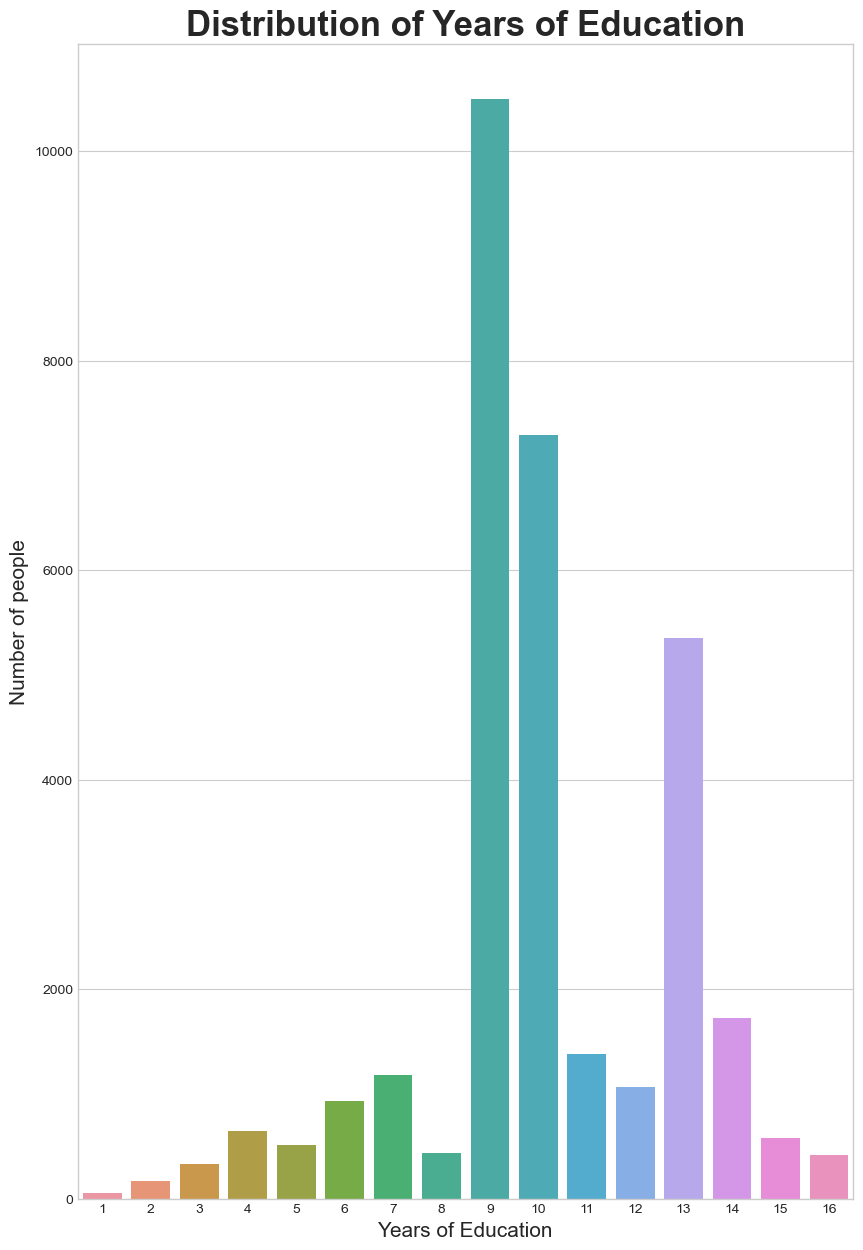

In [30]:
#Creating a barplot for 'Years of Education'
ed_y=dfc['education_num'].value_counts()
plt.figure(figsize=(10,15))
sns.barplot(ed_y.index,ed_y.values)
plt.title('Distribution of Years of Education', fontsize=25, fontweight='bold')
plt.ylabel('Number of people', fontsize=15)
plt.xlabel('Years of Education', fontsize=15)
plt.tick_params(labelsize=10)
plt.show()

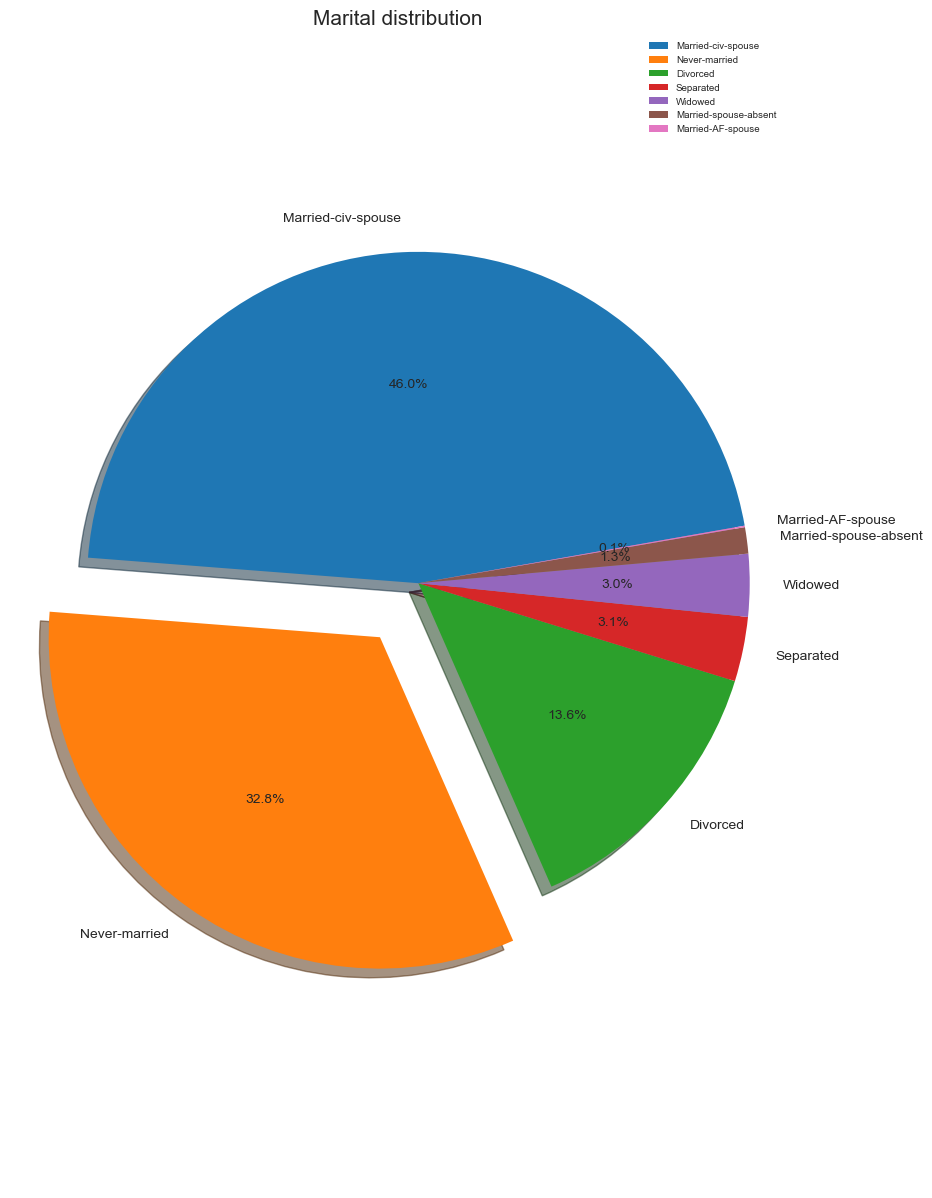

In [32]:
#Creating a pie chart of Marital Status
ms=dfc['marital_status'].value_counts()
plt.figure(figsize=(10,15))
plt.pie(ms.values, labels=ms.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontsize=15)
plt.legend()
plt.legend(prop={'size':7})
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Number of people')

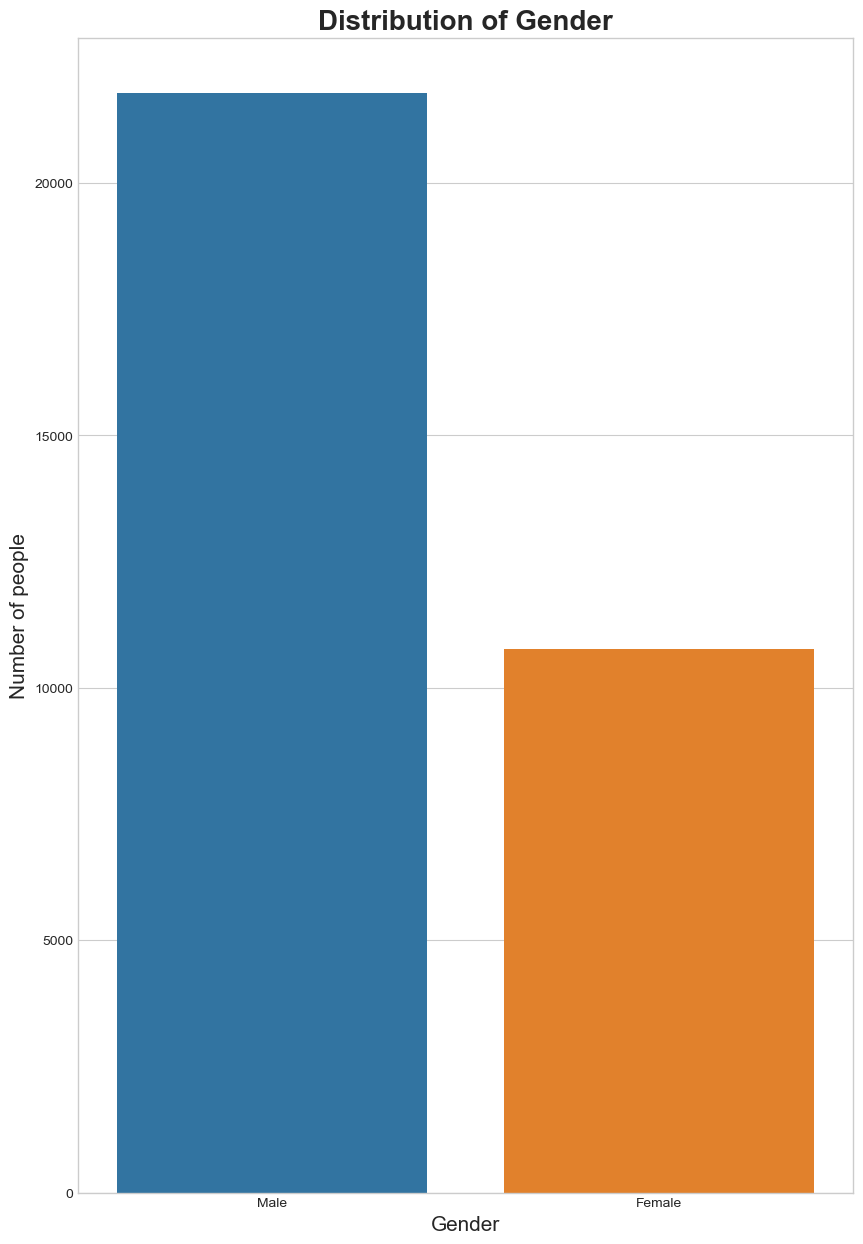

In [34]:
#creating a barplot for Gender
sex=dfc['sex'].value_counts()
plt.figure(figsize=(10,15))
sns.barplot(sex.index,sex.values)
plt.title('Distribution of Gender', fontweight='bold',fontsize='20')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Number of people', fontsize=15)

## Bivariate Analysis

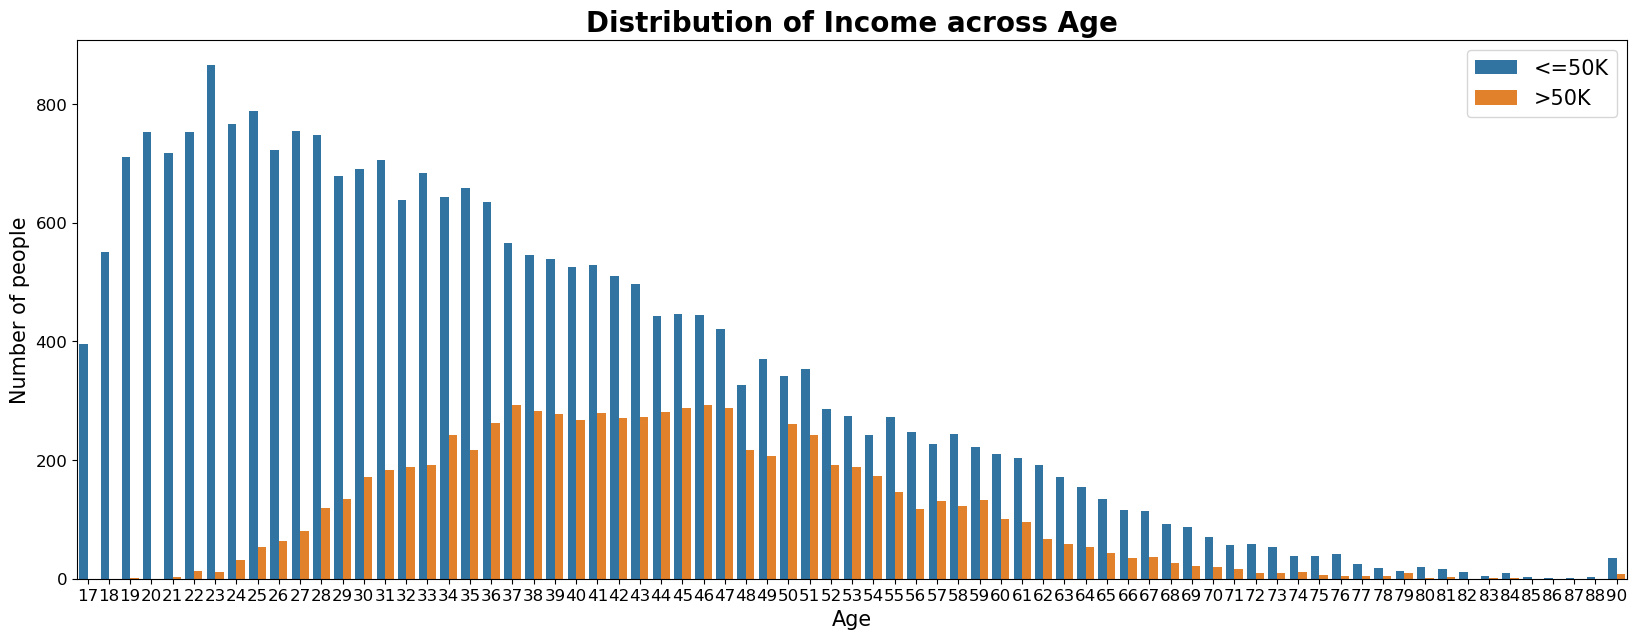

In [41]:
#creating a Count plot of income across age
plt.style.use('default')
plt.figure(figsize=(10,15))
sns.countplot(dfc['age'], hue=dfc['income'])
plt.title('Distribution of Income across Age',fontsize= 20,fontweight= 'bold')
plt.xlabel('Age',fontsize= 15)
plt.ylabel('Number of people',fontsize=15)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

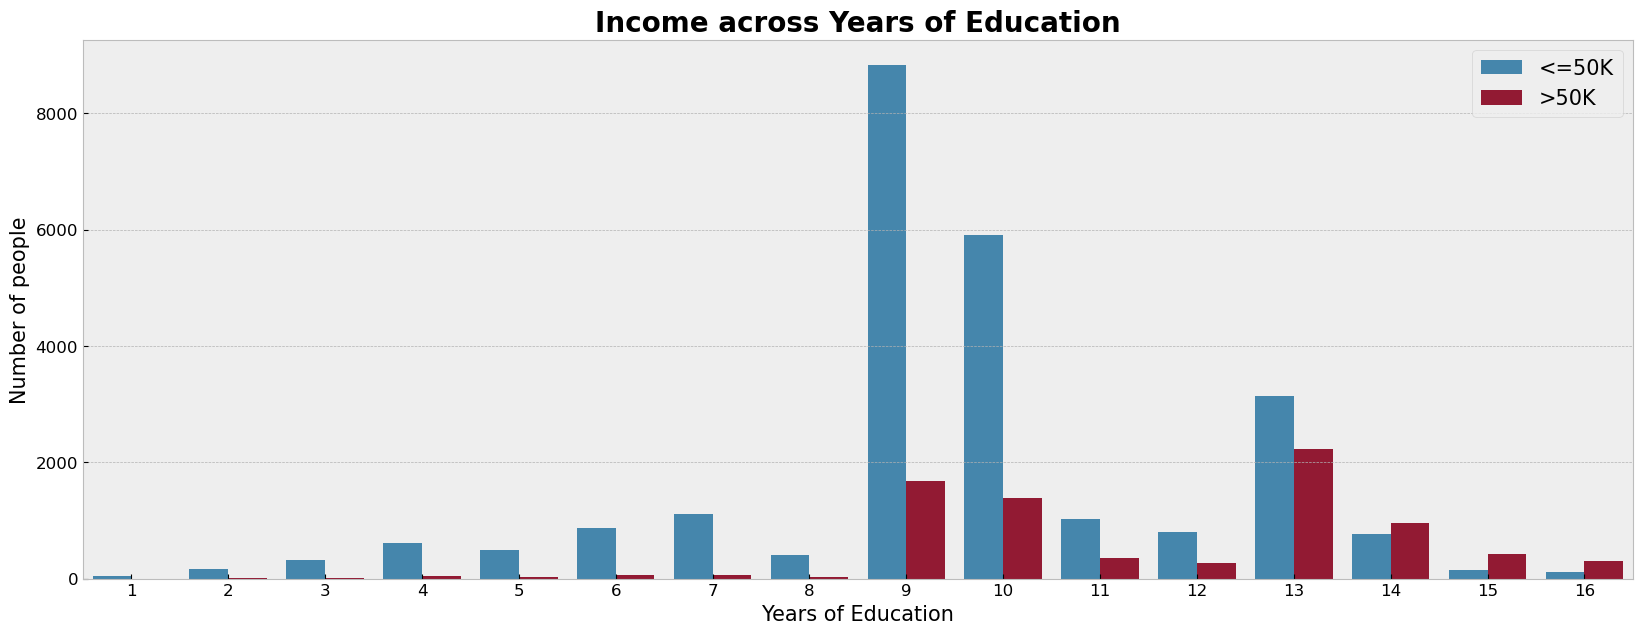

In [44]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(10,15))
sns.countplot(dfc['education_num'],
              hue=dfc['income'])
plt.title('Income across Years of Education',fontsize=20,fontweight='bold')
plt.xlabel('Years of Education',fontsize= 15)
plt.ylabel('Number of people',fontsize= 15)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

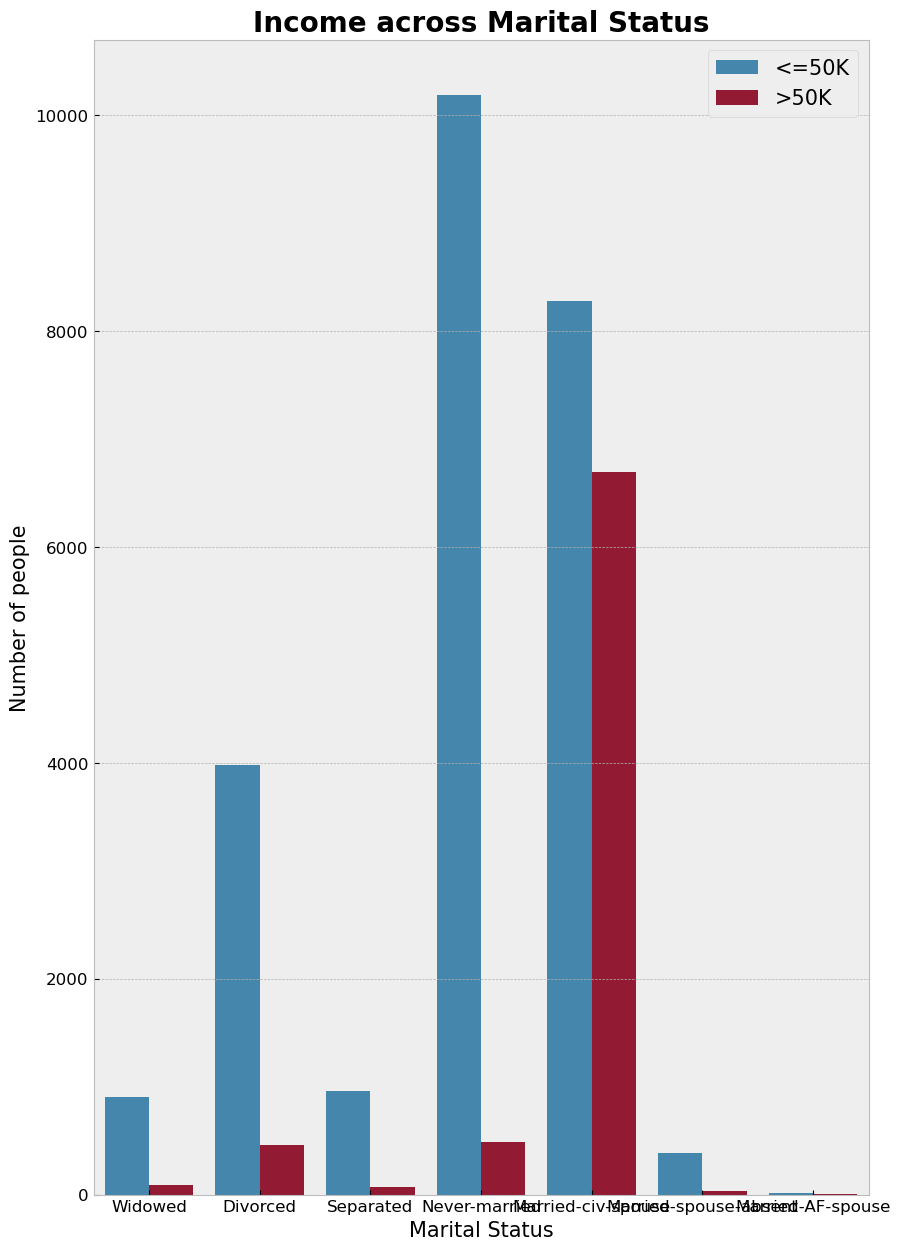

In [45]:
# Creating a countplot of income across Marital Status
plt.style.use('bmh')
plt.figure(figsize=(10,15))
sns.countplot(dfc['marital_status'],
              hue=dfc['income'])
plt.title('Income across Marital Status',fontsize=20,fontweight='bold')
plt.xlabel('Marital Status',fontsize= 15)
plt.ylabel('Number of people',fontsize= 15)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

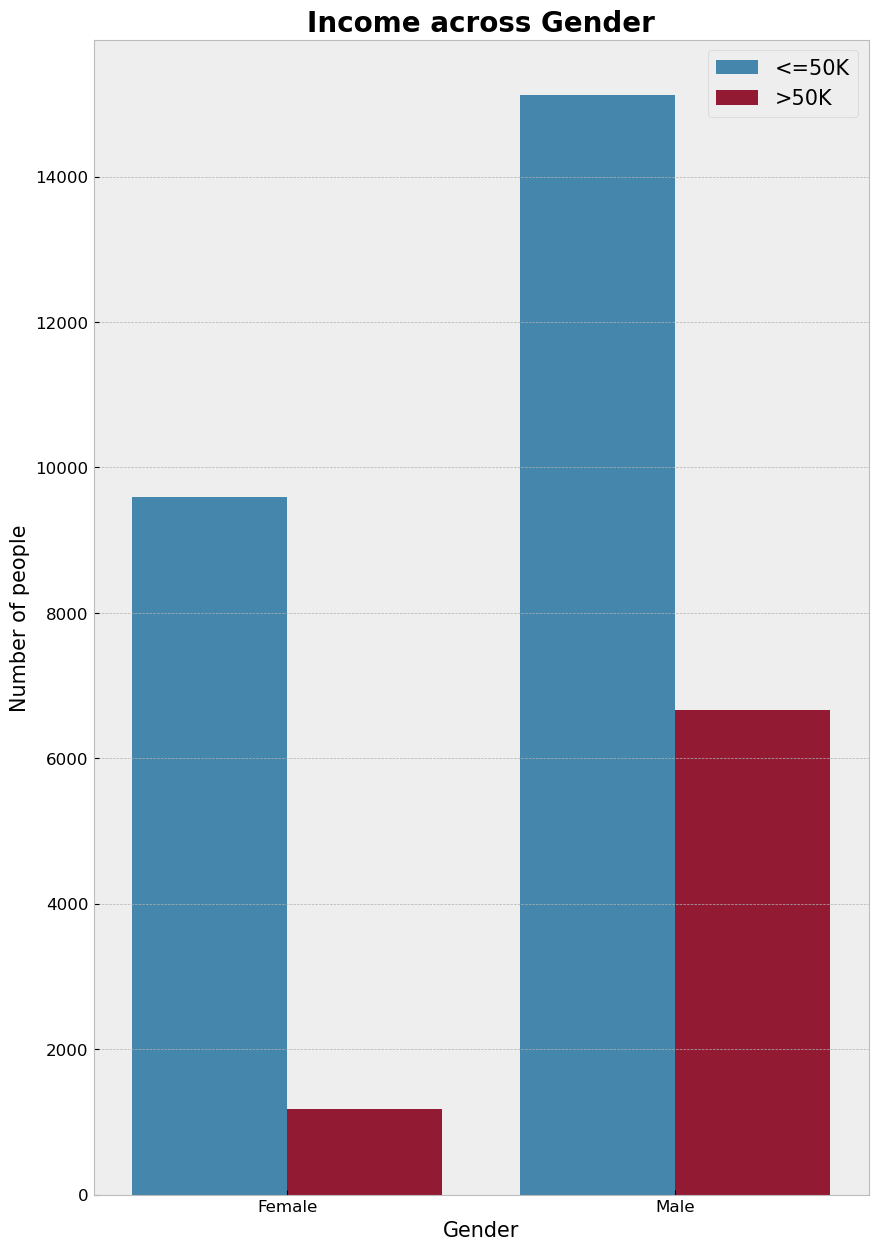

In [46]:
# Creating a countplot of income across gender
plt.style.use('bmh')
plt.figure(figsize=(10,15))
sns.countplot(dfc['sex'],
              hue=dfc['income'])
plt.title('Income across Gender',fontsize=20,fontweight='bold')
plt.xlabel('Gender',fontsize= 15)
plt.ylabel('Number of people',fontsize= 15)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

## Multivariate Analysis

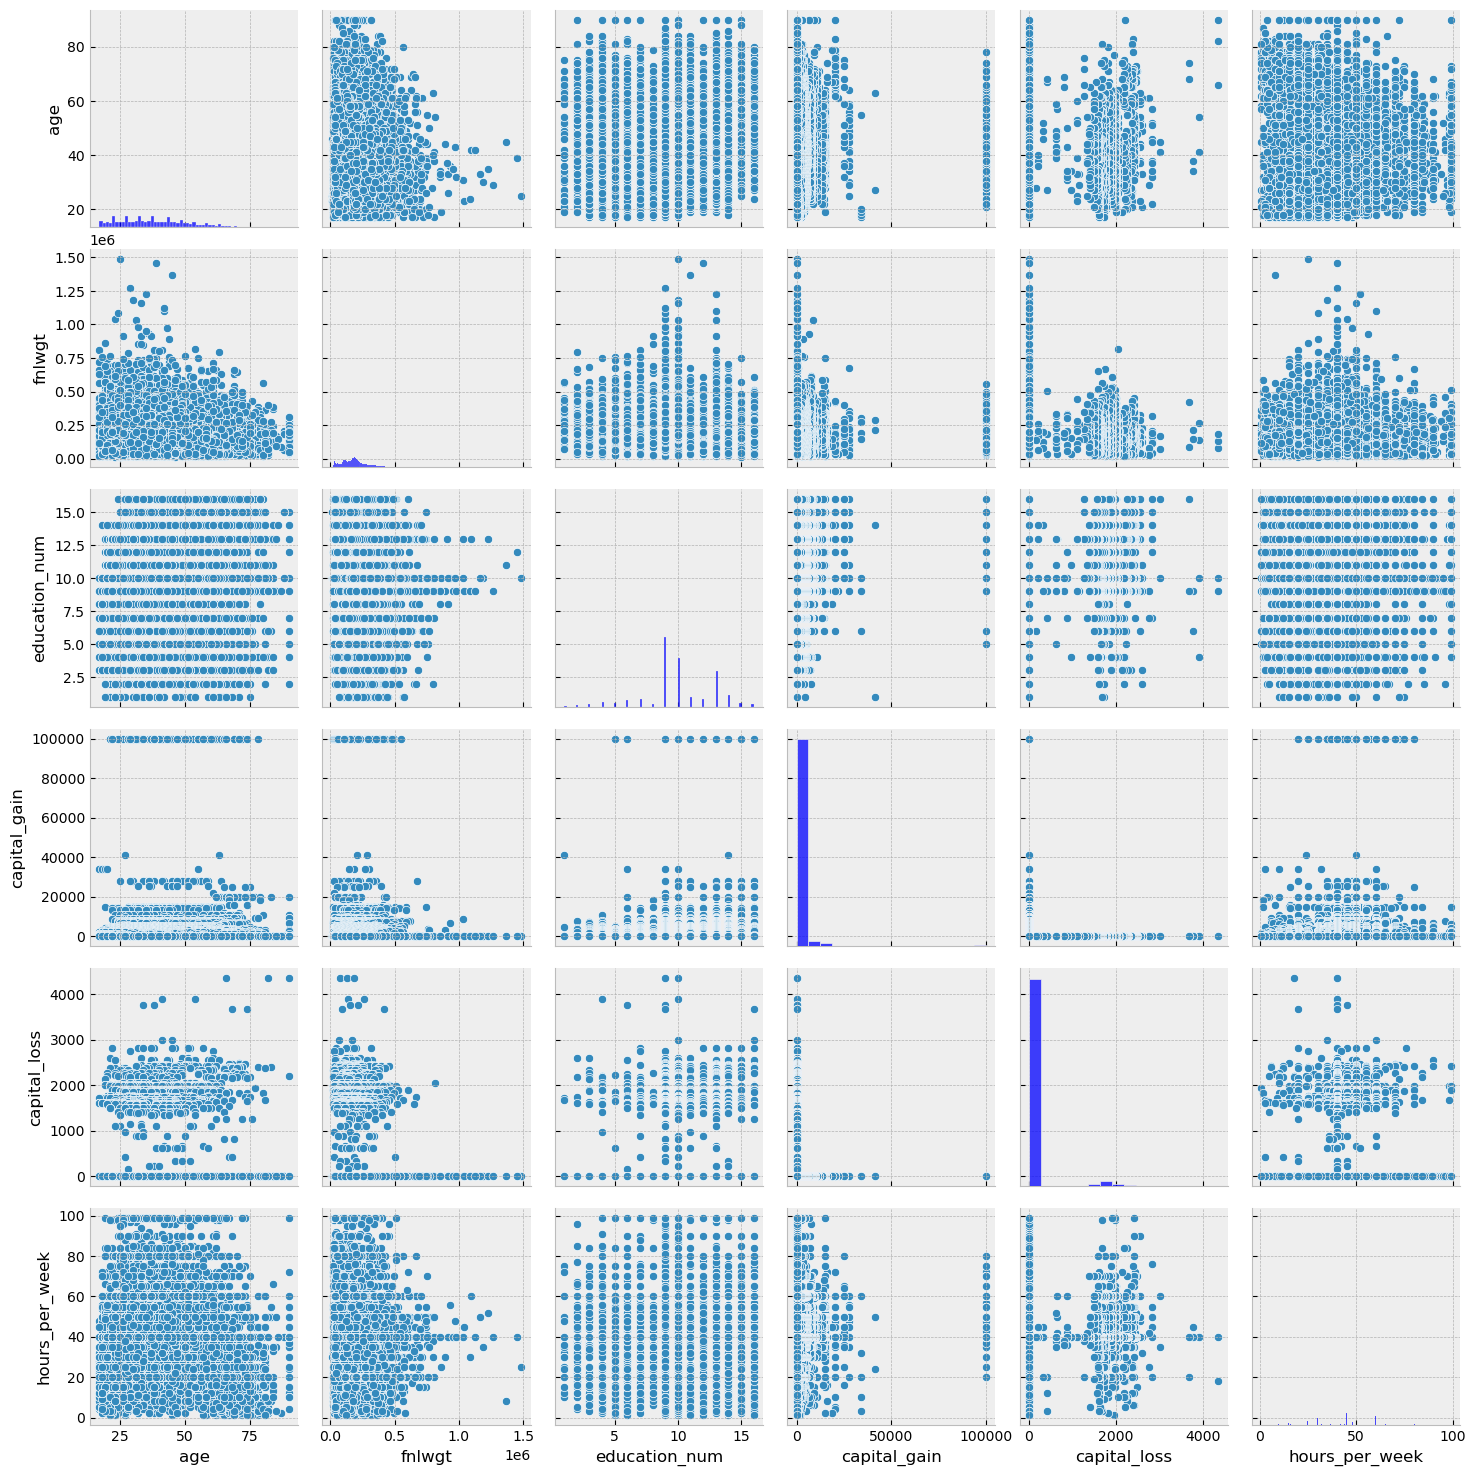

In [47]:
sns.pairplot(dfc)
plt.show()

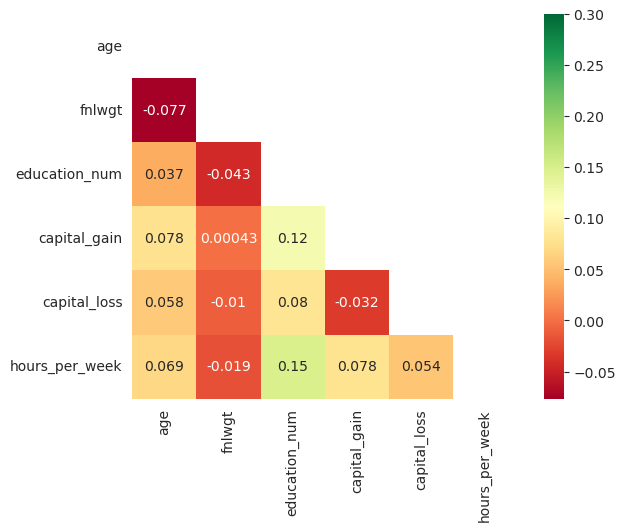

In [48]:
corr = dfc.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.show()


## Data Preprocessing

In [50]:
#replacing the '?' values in dataset
dfc=dfc.replace('?',np.nan)

In [51]:
dfc.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [53]:
col_nan=['workclass','occupation','native_country']
for col in col_nan:
    dfc[col].fillna(dfc[col].mode()[0],inplace=True)

In [56]:
## Label encoding
from sklearn.preprocessing import LabelEncoder
for col in dfc.columns:
    if dfc[col].dtypes=='object':
        encoder= LabelEncoder()
        dfc[col]=encoder.fit_transform(dfc[col])

In [57]:
## Feature Selection
X=dfc.drop('income',axis=1)
Y=dfc['income']

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)


In [59]:
selector.fit(X,Y)

ExtraTreesClassifier(random_state=42)

In [60]:
feature_imp = selector.feature_importances_

In [61]:
for index, val in enumerate(feature_imp):
    print(index,round((val*100),2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [62]:
X = X.drop(['workclass','education','race','sex','capital_loss','native_country'],axis=1)

In [63]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [65]:
for col in X.columns:
    X[col]=scaler.fit_transform(X[col].values.reshape(-1,1))

## Creating a train test split

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

## Data Modelling

## Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [69]:
Y_pred_rfc=rfc.predict(X_test)

## Extra Tree Classifier

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train,Y_train)

ExtraTreesClassifier(random_state=42)

In [72]:
Y_pred_etc=etc.predict(X_test)

## Bagging classifier

In [74]:
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier(random_state =42)
bgc.fit(X_train,Y_train)

BaggingClassifier(random_state=42)

In [75]:
Y_pred_bgc=bgc.predict(X_test)

## Voting Classifier

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
m1 = LogisticRegression(random_state=42)
m2 =  RandomForestClassifier(random_state=1)
m3 =  GaussianNB()
vc= VotingClassifier(estimators=[('lr',m1),('rf',m2),('gnb',m3)],voting='hard')
vc.fit(X_train,Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('gnb', GaussianNB())])

In [78]:
Y_pred_vc=vc.predict(X_test)

## Support Vector Classification

In [105]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [106]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [107]:
Y_pred_svc=svc.predict(X_test)

## Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [109]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [110]:
Y_pred_log_reg = log_reg.predict(X_test)

## KNN Classifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [113]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [114]:
Y_pred_knn = knn.predict(X_test)

## Naive Bayes Classifier

In [115]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [116]:
nb.fit(X_train, Y_train)

GaussianNB()

In [117]:
Y_pred_nb = nb.predict(X_test)

## XGB Classifier

In [118]:
from xgboost import XGBClassifier
xgb = XGBClassifier()


In [120]:
xgb.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [121]:
Y_pred_xgb = xgb.predict(X_test)


## Model Evaluation

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [80]:
print('Random Forest Classifier :')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_rfc)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rfc) * 100, 2))

Random Forest Classifier :
Accuracy score: 84.72
F1 score: 65.04


In [81]:
print('Extra Tree Classifier :')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_etc)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_etc) * 100, 2))

Extra Tree Classifier :
Accuracy score: 83.65
F1 score: 63.09


In [82]:
print('Bagging Classifier :')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_bgc)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_bgc) * 100, 2))

Bagging Classifier :
Accuracy score: 83.61
F1 score: 61.36


In [83]:
print('Voting Classifier :')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_vc)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_vc) * 100, 2))

Voting Classifier :
Accuracy score: 83.23
F1 score: 53.07


In [122]:
print('Support Vector Classifier :')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_svc)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier :
Accuracy score: 84.74
F1 score: 62.34


In [123]:
print('logistic Classifier :')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_log_reg)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

logistic Classifier :
Accuracy score: 82.29
F1 score: 53.87


In [124]:
print('KNN Classifier :')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_knn)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier :
Accuracy score: 83.04
F1 score: 62.59


In [125]:
print('Naive Bayes Classifier :')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_nb)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier :
Accuracy score: 79.58
F1 score: 34.53


In [126]:
print('XGB Classifier :')
print('Accuracy score:',round(accuracy_score(Y_test,Y_pred_xgb)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier :
Accuracy score: 86.19
F1 score: 68.5


## Hyper Parameter Tuning

In [84]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [88]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,Y_train)

In [ ]:
grid_search.best_params_

In [90]:
rfm_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)

In [92]:
rfm_with_best_params.fit(X_train,Y_train)

RandomForestClassifier(max_depth=14, max_features='log2', n_estimators=115)

In [96]:
Y_pred_gcv=rfm_with_best_params.predict(X_test)

In [99]:
accuracy_score(Y_test,Y_pred_gcv)

0.858941549800389

In [100]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_gcv) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_gcv) * 100, 2))

Random Forest Classifier:
Accuracy score: 85.89
F1 score: 66.89


In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_gcv)

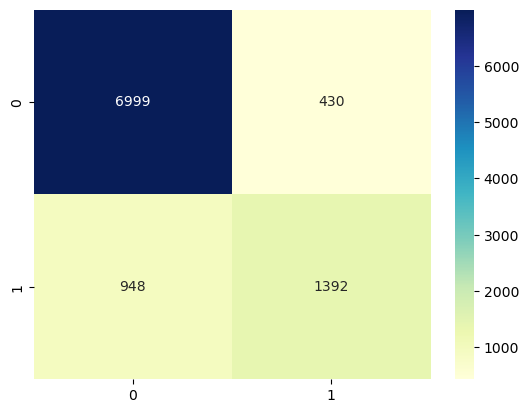

In [103]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [104]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_gcv))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7429
           1       0.76      0.59      0.67      2340

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769

